In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [4]:
!wget https://www.dropbox.com/scl/fi/9d460d91ta9fq2hc3c0yb/hotel_bookings.zip?rlkey=0244nwxr33g0piz2t9l5r2r0b&dl=0  -O hotel_bookings.zip


/bin/bash: line 1: -O: command not found
--2024-02-09 14:24:37--  https://www.dropbox.com/scl/fi/9d460d91ta9fq2hc3c0yb/hotel_bookings.zip?rlkey=0244nwxr33g0piz2t9l5r2r0b
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucafb5f50462b04e226b5638022e.dl.dropboxusercontent.com/cd/0/inline/CM_uyC8k3Ful13GdAcOzODTRLNX4_avQqeBnmta1CEz_s5fSLJZTRgt808iarshPYo6JTZhxXccmgcWIimM1vQGqJi9asYwT91OQppXMRxe-IwmDl2lzOe4SyUcYniri4PcyKCw-9B8swV5cXYdmzX-g/file# [following]
--2024-02-09 14:24:38--  https://ucafb5f50462b04e226b5638022e.dl.dropboxusercontent.com/cd/0/inline/CM_uyC8k3Ful13GdAcOzODTRLNX4_avQqeBnmta1CEz_s5fSLJZTRgt808iarshPYo6JTZhxXccmgcWIimM1vQGqJi9asYwT91OQppXMRxe-IwmDl2lzOe4SyUcYniri4PcyKCw-9B8swV5cXYdmzX-g/file
Resolving ucafb5f50462b04e226b5638022e.dl.dropboxusercontent.com (ucafb5f50462b04e226b5638022e.dl.

In [5]:

!unzip -q hotel_bookings.zip?rlkey=0244nwxr33g0piz2t9l5r2r0b

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,LabelEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer


import warnings
warnings.filterwarnings("ignore")


In [7]:
#find encoding
from chardet.universaldetector import UniversalDetector
detector = UniversalDetector()
with open('hotel_bookings.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [8]:
df=pd.read_csv("./hotel_bookings.csv",encoding="ascii")
display(df.head(2))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [9]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d %H:%M:%S')
#WE CAN SET timestamp as index column if further analys needed .

In [10]:
#lets create a arrival date column
df['date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


In [11]:
def dataframe_info(df):
    print("dataframe shape is :", df.shape)
    columns_x = df.copy()
    tmp = []

    for col in columns_x:
        ser = df[col]
        tmp.append({
            'name': ser.name,
            'dtype': str(ser.dtype),
            'n_unique': len(ser.unique()),
            'n_null': ser.isnull().sum(),
        })
    df_info = pd.DataFrame(tmp)
    display(df_info)

In [12]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.columns[df.dtypes == 'object']


In [13]:
def duplicates(data : pd.DataFrame) -> pd.DataFrame:
  print('old shape is' ,data.shape)
  if data.duplicated().any() == True:
    #check for duplicate rows based on all columns
    duplicates_all_columns = data[data.duplicated()]
    display(duplicates_all_columns.head(2))
    #To count the number of duplicates
    num_duplicates = data.duplicated().sum()
    print("duplicated values are : " ,num_duplicates)

    data.drop_duplicates( keep='first',inplace=True)
  print("new shape is : ")
  display(data.shape)

  return data

In [14]:
df=duplicates(df)
df.head(2)

old shape is (119390, 33)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07,2015-07-01


duplicated values are :  31994
new shape is : 


(87396, 33)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


#Numerical Columns

In [15]:
display(df[num_cols].head(2))
display(df[num_cols].shape)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0


(87396, 20)

In [16]:
dataframe_info(df[num_cols])

dataframe shape is : (87396, 20)


,name,dtype,n_unique,n_null
0,is_canceled,int64,2,0
1,lead_time,int64,479,0
2,arrival_date_year,int64,3,0
3,arrival_date_week_number,int64,53,0
4,arrival_date_day_of_month,int64,31,0
5,stays_in_weekend_nights,int64,17,0
6,stays_in_week_nights,int64,35,0
7,adults,int64,14,0
8,children,float64,6,4
9,babies,int64,5,0


In [17]:
for row in df[num_cols].columns:
  display(print(f'(column name : {row} and unique values is :',df[num_cols][row].unique()))

(column name : is_canceled and unique values is : [0 1]


None

(column name : lead_time and unique values is : [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 16

None

(column name : arrival_date_year and unique values is : [2015 2016 2017]


None

(column name : arrival_date_week_number and unique values is : [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]


None

(column name : arrival_date_day_of_month and unique values is : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


None

(column name : stays_in_weekend_nights and unique values is : [ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]


None

(column name : stays_in_week_nights and unique values is : [ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 25 17 32 26 18 34 35 41]


None

(column name : adults and unique values is : [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]


None

(column name : children and unique values is : [ 0.  1.  2. 10.  3. nan]


None

(column name : babies and unique values is : [ 0  1  2 10  9]


None

(column name : is_repeated_guest and unique values is : [0 1]


None

(column name : previous_cancellations and unique values is : [ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]


None

(column name : previous_bookings_not_canceled and unique values is : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 27 28 29 30 19 26 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


None

(column name : booking_changes and unique values is : [ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]


None

(column name : agent and unique values is : [ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  2

None

(column name : company and unique values is : [ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 

None

(column name : days_in_waiting_list and unique values is : [  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]


None

(column name : adr and unique values is : [  0.    75.    98.   ... 266.75 209.25 157.71]


None

(column name : required_car_parking_spaces and unique values is : [0 1 2 8 3]


None

(column name : total_of_special_requests and unique values is : [0 1 3 2 4 5]


None

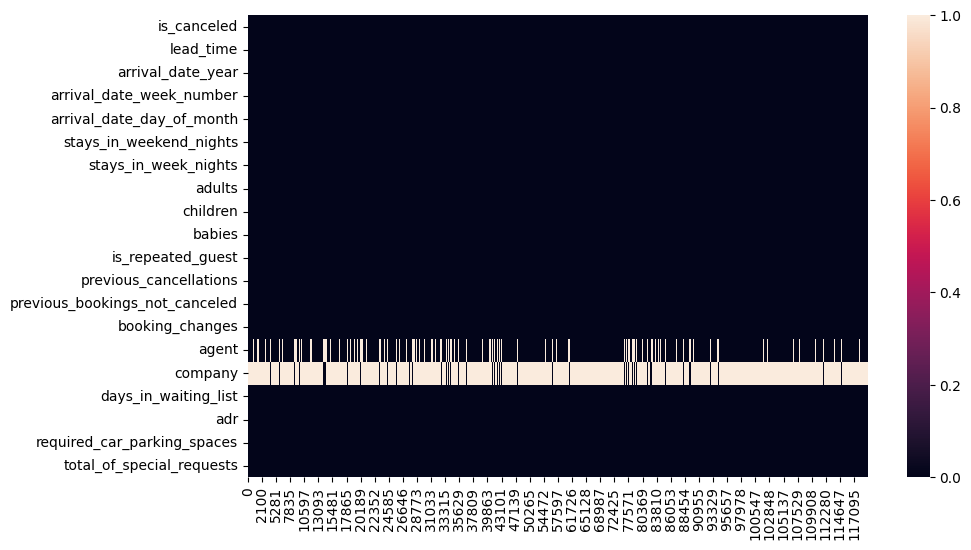

In [18]:
#nan_values oh numerical cols
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].isna().transpose());

In [19]:

def nan_values_handle(data):
  print("missing_values")
  print("data_shape :" ,data.shape)
  percent_missing = data.isnull().sum() * 100 / len(data)
  missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
  display(missing_value_df.sort_values(ascending=False,by="percent_missing")[:50])

  print("drop_cols_with_more_then_nan_values_0.6%")
  missing_data_high=missing_value_df["percent_missing"]>10
  display(missing_data_high[missing_data_high==True].index)

  drop_cols=missing_data_high[missing_data_high==True].index
  data.drop(drop_cols,axis=1,inplace=True)
  display(data.shape)
  return data

In [20]:
df_numerical=nan_values_handle(df[num_cols])


missing_values
data_shape : (87396, 20)


,column_name,percent_missing
company,company,93.982562
agent,agent,13.951439
children,children,0.004577
is_canceled,is_canceled,0.000000
previous_cancellations,previous_cancellations,0.000000
required_car_parking_spaces,required_car_parking_spaces,0.000000
adr,adr,0.000000
days_in_waiting_list,days_in_waiting_list,0.000000
booking_changes,booking_changes,0.000000
previous_bookings_not_canceled,previous_bookings_not_canceled,0.000000


drop_cols_with_more_then_nan_values_0.6%


Index(['agent', 'company'], dtype='object')

(87396, 18)

In [21]:
df_numerical['total_guests'] = df_numerical['adults'] + df_numerical['children'] + df_numerical['babies']
df_numerical['total_guests'].head()

0    2.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: total_guests, dtype: float64

In [22]:
# get the total room nights stayed based on arrival date
df_numerical['total_nigths'] = df_numerical['stays_in_week_nights'] + df_numerical['stays_in_weekend_nights']
df_numerical['total_nigths'].tail()

119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_nigths, dtype: int64

In [23]:
drop_columns=[
   'stays_in_week_nights',
   'stays_in_weekend_nights',
   'adults',
   'children',
   'babies',
   'arrival_date_year',
   'arrival_date_day_of_month',
]
df_numerical.drop(columns=drop_columns,axis=1,inplace=True)

In [24]:
#add new feature
df_numerical['add'] = df_numerical.groupby(['previous_bookings_not_canceled'])['previous_cancellations'].transform('sum')


In [25]:
df_numerical.previous_bookings_not_canceled.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [26]:
labels = [1, 2, 3, 4]

# Apply pd.cut() to create a new column 'add_2'
df_numerical['add_2'] = pd.cut(df_numerical['previous_bookings_not_canceled'], bins=4, labels=labels, right=False)

# Convert the datatype to integer
df_numerical['add_2'] = df_numerical['add_2'].astype(int)

In [27]:
df_numerical['add_3'] = df_numerical.groupby(['required_car_parking_spaces'])['add_2'].transform('sum')


In [28]:
df_numerical.describe().transpose().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.000000,0.274898,0.446466,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,87396.000000,79.891368,86.052325,0.000000,11.000000,49.000000,125.000000,737.000000
arrival_date_week_number,87396.000000,26.838334,13.674572,1.000000,16.000000,27.000000,37.000000,53.000000
is_repeated_guest,87396.000000,0.039075,0.193775,0.000000,0.000000,0.000000,0.000000,1.000000
previous_cancellations,87396.000000,0.030413,0.369145,0.000000,0.000000,0.000000,0.000000,26.000000
previous_bookings_not_canceled,87396.000000,0.183990,1.731894,0.000000,0.000000,0.000000,0.000000,72.000000
booking_changes,87396.000000,0.271603,0.727245,0.000000,0.000000,0.000000,0.000000,21.000000
days_in_waiting_list,87396.000000,0.749565,10.015731,0.000000,0.000000,0.000000,0.000000,391.000000
adr,87396.000000,106.337246,55.013953,-6.380000,72.000000,98.100000,134.000000,5400.000000
required_car_parking_spaces,87396.000000,0.084226,0.281533,0.000000,0.000000,0.000000,0.000000,8.000000


In [32]:
df_numerical.adr.unique()

array([False, False, False, ..., False, False, False])

In [30]:
df_numerical[df_numerical["adr"]<0]

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nigths,add,add_2,add_3
14969,0,195,10,1,0,2,2,0,-6.38,0,0,2.0,10,77,1,80275


In [29]:
sadfasdf

NameError: name 'sadfasdf' is not defined

While Pearson's correlation coefficient is most effective when the variables are normally distributed, its use is not strictly limited to normally distributed data.

In [ ]:
corr_matrix = df_numerical.corr(method='pearson') #method='pearson'for linearity ,we can use also Spearman's Rank Correlation Coefficient
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
# Plot heatmap
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Show the plot
plt.show()


drop columns which contains  multycorrelation simulation - [add , is repeated_guest : -0.8]

also drop columns which std() is so low : like booking_changes 0.727245

In [33]:
new_drop=[
    'add_2',
    'required_car_parking_spaces',
    'booking_changes',
    'days_in_waiting_list',
    'total_nigths',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'is_repeated_guest',
    'arrival_date_week_number'
]
df_numerical.drop(columns=new_drop,axis=1,inplace=True)

now we choose spearman correlation between variables(numerical)

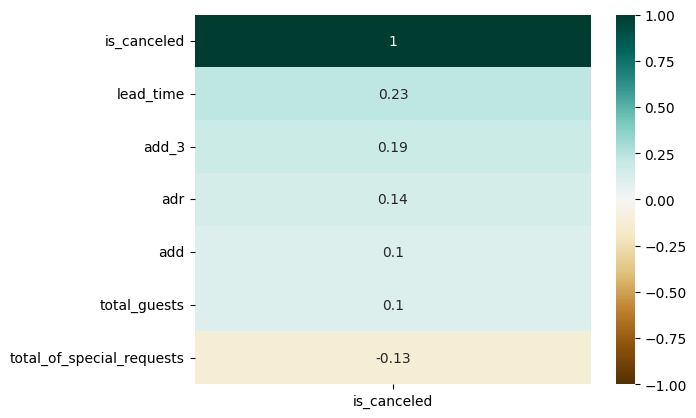

In [34]:
heatmap = sns.heatmap(df_numerical.corr(method='spearman')[['is_canceled']].sort_values(by='is_canceled',
                                                                                          ascending=False),
                                                                                           vmin=-1, vmax=1, annot=True, cmap='BrBG')


#Categorical Columns

In [35]:
display(df[cat_cols].describe(include='object').transpose())


,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
country,86944,177,PRT,27453
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
reserved_room_type,87396,10,A,56552
assigned_room_type,87396,12,A,46313
deposit_type,87396,3,No Deposit,86251
customer_type,87396,4,Transient,71986


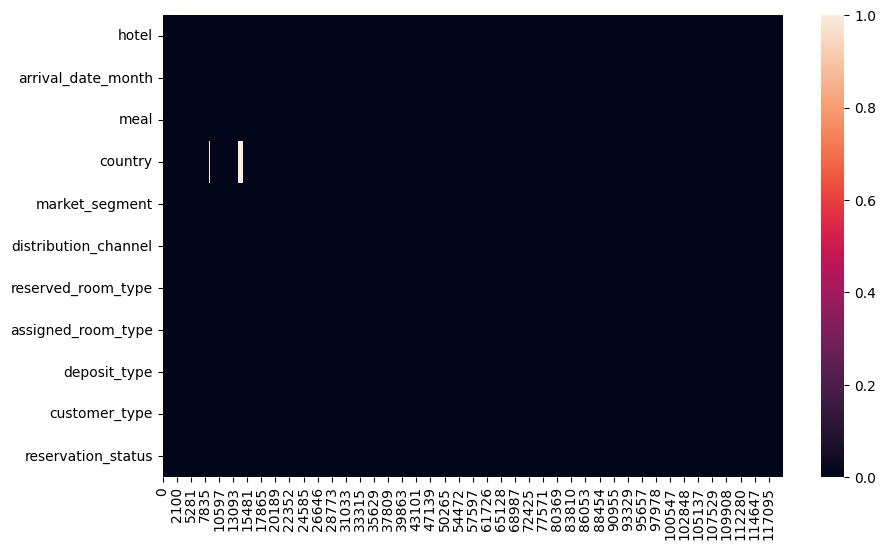

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df[cat_cols].isna().transpose());

In [37]:
for row in df[cat_cols].columns:
  display(print(f'(column name : {row} and unique values is :',df[row].unique()))

(column name : hotel and unique values is : ['Resort Hotel' 'City Hotel']


None

(column name : arrival_date_month and unique values is : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


None

(column name : meal and unique values is : ['BB' 'FB' 'HB' 'SC' 'Undefined']


None

(column name : country and unique values is : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' '

None

(column name : market_segment and unique values is : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


None

(column name : distribution_channel and unique values is : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


None

(column name : reserved_room_type and unique values is : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


None

(column name : assigned_room_type and unique values is : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


None

(column name : deposit_type and unique values is : ['No Deposit' 'Refundable' 'Non Refund']


None

(column name : customer_type and unique values is : ['Transient' 'Contract' 'Transient-Party' 'Group']


None

(column name : reservation_status and unique values is : ['Check-Out' 'Canceled' 'No-Show']


None

In [38]:
df_cat=df[cat_cols].copy()
#df_cat.drop( 'arrival_date_month',axis=1,inplace=True)

In [39]:
country_counts=df_cat.country.value_counts()[:110]
country_counts

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
CIV        6
JAM        6
KEN        6
TZA        5
MNE        5
Name: country, Length: 110, dtype: int64

In [40]:
top_110_countries=df_cat.country.head(110).values
df_cat.country = df_cat.country.apply(lambda x: x if x in top_110_countries else 'rare')


In [41]:
df_cat[df_cat.country=='rare'].shape

(17533, 11)

In [42]:
df_cat.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'rare', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE'], dtype=object)

In [43]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September',
               'October', 'November', 'December']
df_cat['arrival_date_month'] = df_cat['arrival_date_month'].apply(lambda x: month_order.index(x) + 1)

In [44]:
mapping = {'Resort Hotel': 1, 'City Hotel': 0}
# Apply the mapping
df_cat['hotel'] = df_cat['hotel'].map(mapping)


#Vizualition

In [ ]:
display(df_cat.shape)
display(df_numerical.shape)
df_cat.shape[0]==df_numerical.shape[0]==df.shape[0]

In [46]:
joined_list = [*df_numerical.columns, *df_cat.columns] # unpack both iterables in a list literal print(joined_list)
display(len(joined_list))

18

In [47]:
final_df=pd.concat([df_numerical,df_cat],axis=1)
display(final_df.shape)
display(final_df.head(2))

(87396, 18)

,is_canceled,lead_time,adr,total_of_special_requests,total_guests,add,add_3,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,0,342,0.0,0,2.0,1313,80275,1,7,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,0,737,0.0,0,2.0,1313,80275,1,7,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out


Percentage of book not canceled: 27.49 % --> (24025 customers)
Percentage of book  canceled: 72.51 % --> (63371 customers)


Text(0, 0.5, 'Total Count')

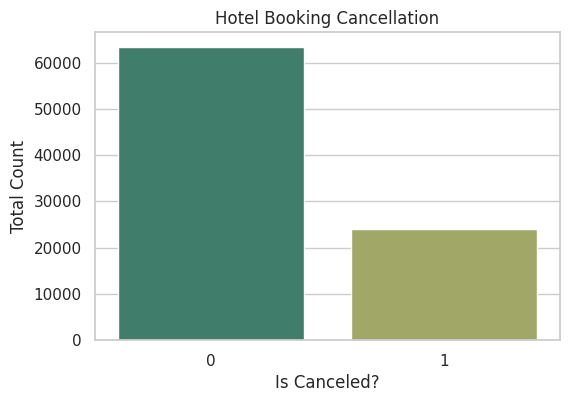

In [48]:
y_target = df.is_canceled

print(f'Percentage of book not canceled: {round(y_target.value_counts(normalize=True)[1]*100,2)} % --> ({y_target.value_counts()[1]} customers)')
print(f'Percentage of book  canceled: {round(y_target.value_counts(normalize=True)[0]*100,2)} % --> ({y_target.value_counts()[0]} customers)')

## is_cancelled
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="is_canceled", data=df,palette='gist_earth')
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

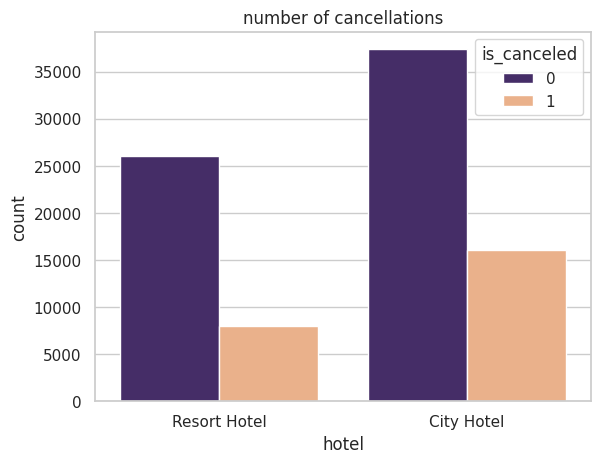

In [49]:
sns.countplot(x = 'hotel',hue = 'is_canceled', data = df, palette=['#432371',"#FAAE7B"])
plt.title("number of cancellations")
plt.show()

<Axes: xlabel='arrival_date_year', ylabel='count'>

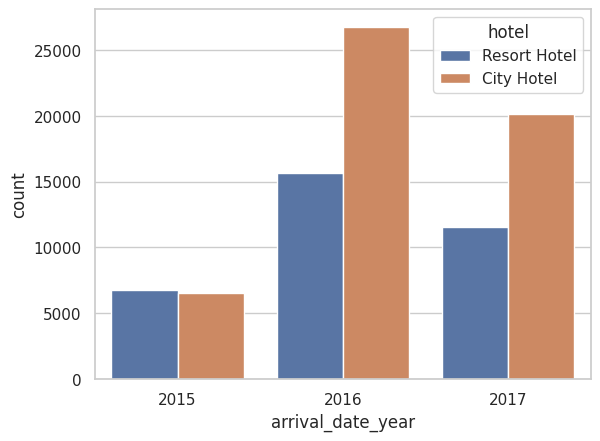

In [50]:
sns.countplot(x = 'arrival_date_year', data = df, hue = 'hotel')


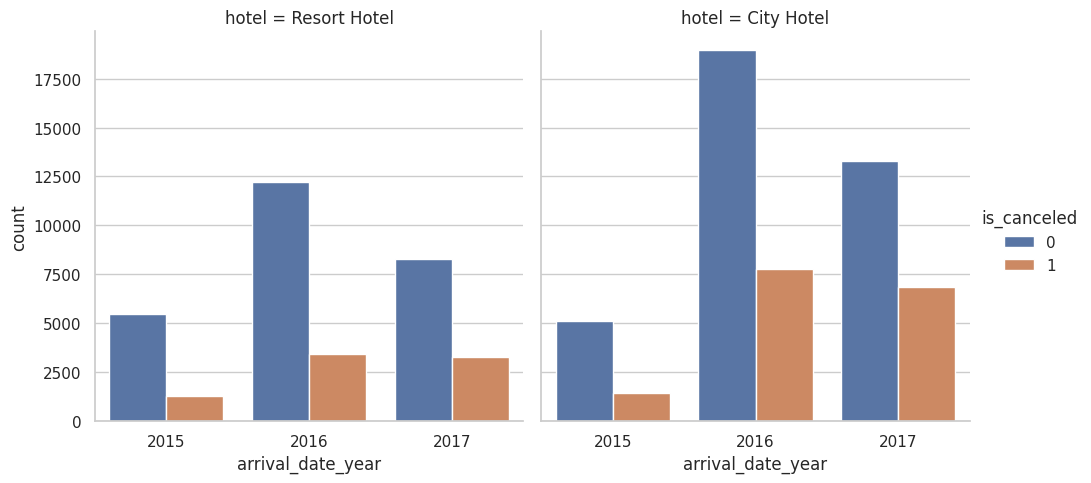

In [51]:
sns.catplot(x ="arrival_date_year", hue="is_canceled", col="hotel", data = df, kind="count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

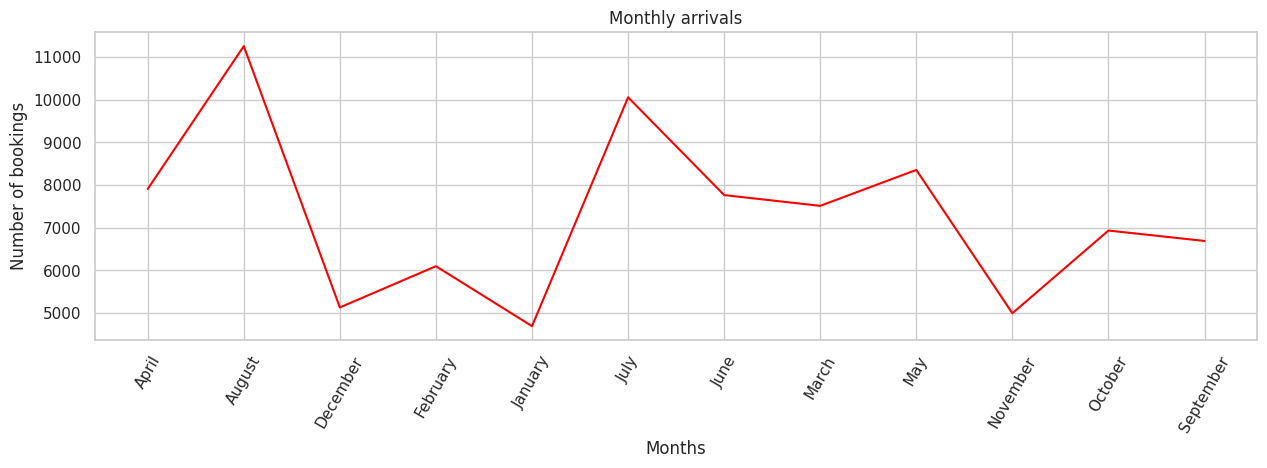

In [52]:
df_year = df.groupby(['arrival_date_month']).agg({'hotel':'count'}).reset_index()

plt.figure(figsize=(15,4))
sns.lineplot(x = "arrival_date_month",y = 'hotel', data = df_year, color = 'red' )
plt.xticks(rotation = 60)
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')
plt.show

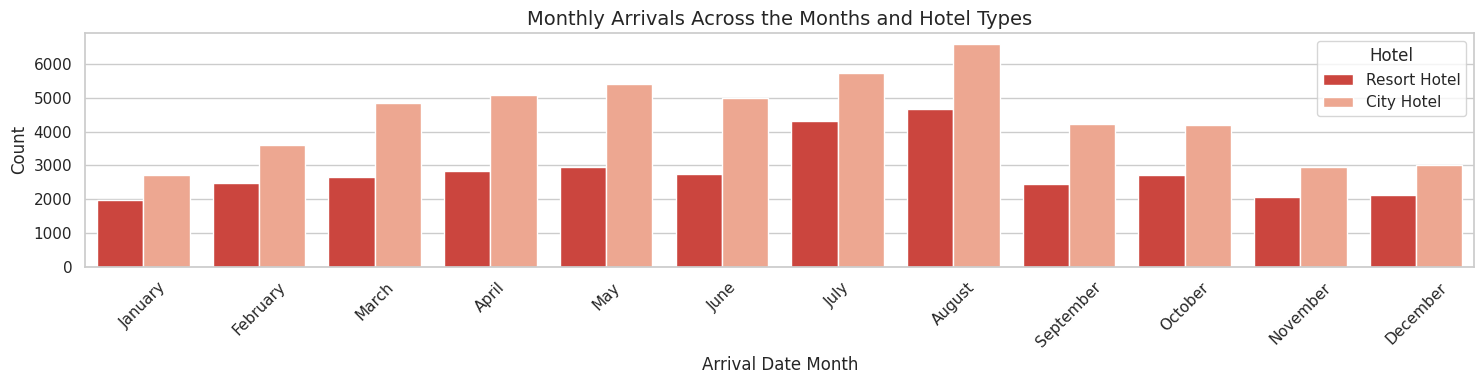

In [53]:
# Create the countplot
fig = plt.figure(figsize=(15, 4))
ax = sns.countplot(data=df, x='arrival_date_month', hue='hotel', palette="Reds_r", order=month_order)

plt.title('Monthly Arrivals Across the Months and Hotel Types', fontsize=14)
plt.xlabel('Arrival Date Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


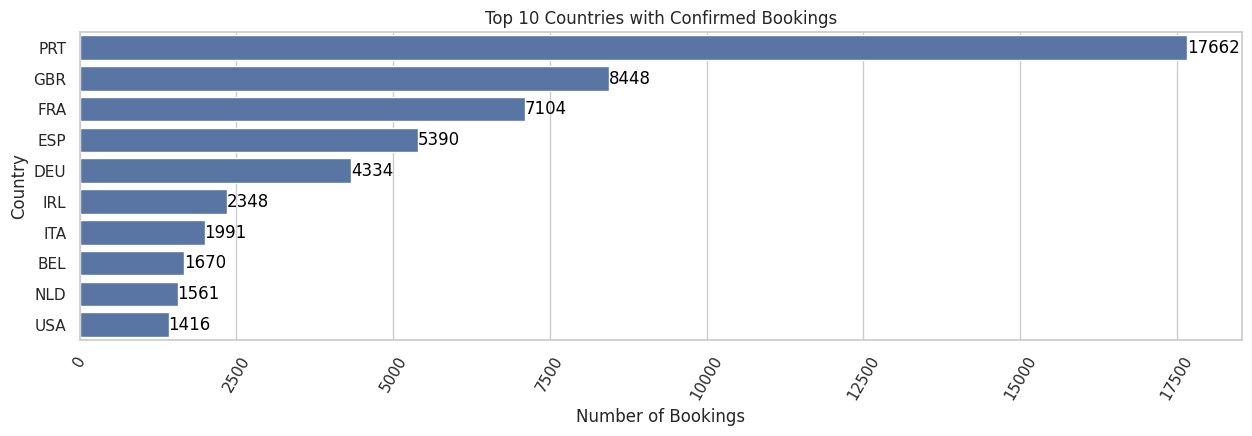

In [54]:
bookings_confirmed = df[df['is_canceled'] == 0]

df_country = bookings_confirmed.groupby(['country']).agg({'hotel':'count'}).reset_index().sort_values(by=['hotel'],ascending=False)[:10]
plt.figure(figsize=(15,4))
sns.barplot(y="country", x='hotel', data=df_country)

# Add numbers to the bars
for index, value in enumerate(df_country['hotel']):
    plt.text(value, index, str(value), color='black', va='center')

plt.xticks(rotation=60)
plt.title('Top 10 Countries with Confirmed Bookings')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.show()

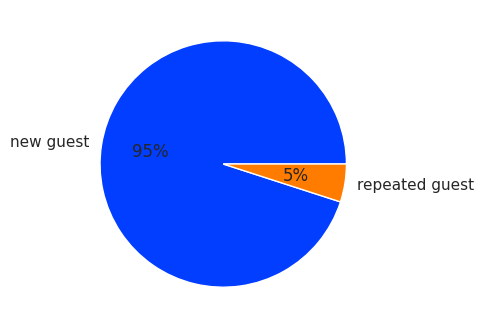

In [55]:
df_pie = bookings_confirmed.groupby(['is_repeated_guest']).agg({'hotel':'count'}).reset_index()
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(10,4))
labels = ['new guest', 'repeated guest']

plt.pie(df_pie['hotel'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


In [60]:
df[df['is_repeated_guest']==1]['adr']

13937       0.00
14681      90.95
14777      66.00
14817      55.68
14823     130.90
           ...  
117701      0.00
117841     65.00
117961    240.00
118029      0.00
119070    270.00
Name: adr, Length: 3415, dtype: float64

In [66]:
df[df['is_repeated_guest']==1].groupby(['is_repeated_guest','adr','date']).agg({'hotel':'count'}).reset_index()

,is_repeated_guest,adr,date,hotel
0,1,-6.38,2017-03-05,1
1,1,0.00,2015-07-16,1
2,1,0.00,2015-08-03,1
3,1,0.00,2015-08-10,1
4,1,0.00,2015-08-12,1
...,...,...,...,...
2631,1,318.00,2017-08-15,1
2632,1,318.82,2017-06-16,1
2633,1,331.00,2017-08-18,1
2634,1,349.00,2017-08-08,1


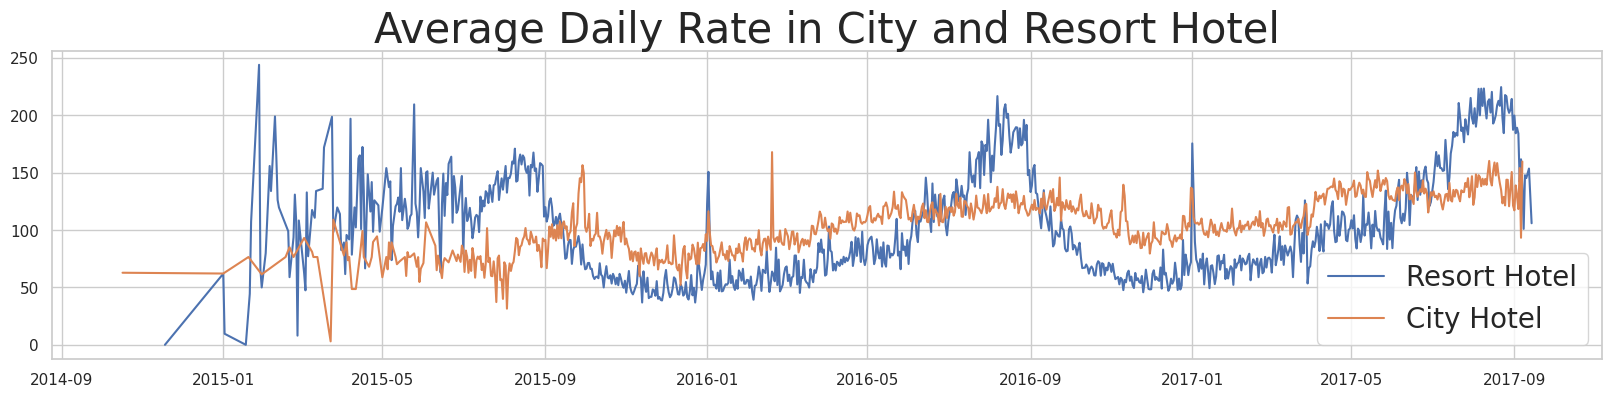

In [56]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize = (20,4))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

In [57]:
group_meal_data = df.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
group_meal_data.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.61,0.03,0.31,0.99,0.00
Resort Hotel,0.39,0.97,0.69,0.01,1.00


In [ ]:
df['year']=df.date.dt.year
df['month']=df.date.dt.month
pivot = df[df['is_canceled']==0].pivot_table( values='is_canceled', index='year',
                                             columns='month', aggfunc='count', fill_value=0).round(2)
new_data=pd.DataFrame(data=pivot.T.values.astype("int64"),
                      columns=list(pivot.index),
                      index=pivot.columns)

f, ax = plt.subplots(figsize=(10, 3))
heatmap = sns.heatmap(data=new_data, annot=True,fmt='.0f', cmap='coolwarm', ax=ax)
heatmap.set_title('count');


In [ ]:
plt.figure(figsize=(30,5))
df[df['is_canceled']==0].groupby(pd.Grouper(key="date", freq="1M"))["is_canceled"].count().plot()

Data Preprocessing

In [ ]:
y = final_df['is_canceled']
X = final_df.drop('is_canceled', axis = 1)

In [ ]:
X.isna().sum()

In [ ]:
num_cols = X.select_dtypes(include=np.number).columns
extra_cat_cols=[num_cols[-2],num_cols[-1]]
num_cols=[item for item in num_cols if item not in extra_cat_cols]
cat_cols = X.columns[X.dtypes == 'object']
print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

In [ ]:
extra_cat_cols

In [ ]:
def split(X,y):
   X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
   print('Training Features Shape:', X_train.shape)
   print('Training Labels Shape:', y_train.shape)
   print('Testing Features Shape:', X_val.shape)
   print('Testing Labels Shape:', y_val.shape)
   return X_train,X_val,y_train,y_val


In [ ]:
X_train,X_val,y_train,y_val=split(X,y)

In [ ]:
display(y_train.value_counts(normalize=True))
display(y_val.value_counts(normalize=True))

In [ ]:
numerical_pipe = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('poly', PolynomialFeatures(degree=1)),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder())
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols),
    ('pass', 'passthrough', extra_cat_cols)  # 'passthrough' means no transformation
])

X_train = preprocessors.fit_transform(X_train, y_train)
X_test = preprocessors.transform(X_val)


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
sel_= SelectFromModel(LogisticRegression(penalty='l1', C=1/0.005,
                                         solver='liblinear',
                                         random_state=0)) #C inverse of regularization strength
# train Lasso model and select features
sel_.fit(X_train,y_train)
# let's print the number of total and selected features

In [ ]:
# let's print the number of total and selected features
selected_feats = pd.DataFrame(X_train).columns[(sel_.get_support())]
# let's print some stats
print('Total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_== 0)))

In [ ]:
X_train=pd.DataFrame(X_train).iloc[:,selected_feats]
X_test=pd.DataFrame(X_test).iloc[:,selected_feats]

#training

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator = LogisticRegression()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    def score(self, X, y):
        return self.estimator.score(X, y)

In [ ]:
def result(X_train,X_val,y_train,y_val,estimator):
  best=estimator
  best.fit(X_train, y_train)

  y_predict=best.predict(X_val)

  scoring = {'ACC': 'accuracy',
             'F1': 'f1',
             'Precision': 'precision',
             'Recall': 'recall'}

  scores = cross_validate(best, X_train, y_train,
                        scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42))


  print('croos_validate''s results  ')
  DF_cv = pd.DataFrame(scores)
  display(DF_cv)
  print('\n')
  print(DF_cv.mean()[2:])

  print(classification_report(y_val, y_predict, target_names=['canceled','not canceled']))

#Not
Due to imbalanced classes, we cannot effectively evaluate using the ROC curve. Instead, we will utilize precision-recall curves. It's essential to assess the model's performance independently of the threshold, focusing on metrics such as precision, recall, and F1-score.

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import itertools
def plot_confusion_matrix(cm, classes,normalize=False):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

#Random_forest

In [ ]:
# Number of trees in random forest
n_estimators =[int(x) for x in np.linspace(1, 60, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 40, num = 41)]
#max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 60, num = 15)]
# Method of selecting samples for training each tree
bootstrap = [False]


parameters = [
  {
        'model': (RandomForestClassifier(),),
        'model__n_estimators': n_estimators,
        'model__max_features': max_features,
        'model__max_depth': max_depth,
        'model__min_samples_leaf': min_samples_leaf,
        'model__bootstrap': bootstrap,
    }
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(steps=[
    ('model',  ClfSwitcher())
])
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=pipeline, param_distributions=parameters,
                              n_iter = 100, scoring='f1',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [ ]:
result(X_train=X_train,X_val=X_test,y_train=y_train,y_val=y_val,estimator=rf_random.best_estimator_)

In [ ]:
rf_random.best_estimator_.fit(X_train, y_train)
y_pred = rf_random.best_estimator_.predict(X_test)
y_score = rf_random.best_estimator_.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_val, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes = class_names, )
plt.savefig('2.xgb_cfl_confusion_matrix.png')
plt.show()

show_metrics()

In [ ]:
12733+4747==y_val.shape[0]

In [ ]:
fpr,tpr,_ =precision_recall_curve(y_val,rf_random.best_estimator_.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)

If all scores in cross-validation, including various evaluation metrics such as accuracy, precision, recall, F1 score, etc., are consistently perfect (i.e., equal to 1), it could indicate that your model is performing exceptionally well across different folds of the data. However, similar considerations apply as with the classification report:

Overfitting: Consistently perfect scores across cross-validation folds could suggest overfitting, especially if the model's performance on unseen data is not as high.

Data Leakage: Data leakage can also affect cross-validation results. Ensure that each fold is independent and does not leak information from the training set to the validation set.

Evaluation Bias: Cross-validation can still suffer from evaluation bias if the dataset is imbalanced or if there are other issues affecting the evaluation process.

Small Dataset: Perfect scores in cross-validation on a small dataset might be due to chance rather than true model performance.

Metric Choice: As always, consider the choice of evaluation metrics and whether they are appropriate for your problem domain. Some metrics may be more sensitive to imbalances or other issues in the data.

In conclusion, while perfect scores in cross-validation are desirable, it's essential to interpret them in context and validate the model's performance on separate test data to ensure its generalization ability and robustness.

but in this case this part of cross-validation is not important actually -correctly preprocessing data,if change scaller or utilize different aproach result will differ from presented

#perfect

In [ ]:
from sklearn.linear_model import LogisticRegression

class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold


    def threshold_from_optimal_f_score(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        fscores = (2 * precisions * recalls) / (precisions + recalls)

        optimal_idx = np.argmax(fscores)

        return thresholds[optimal_idx], fscores[optimal_idx]

In [ ]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train)

In [ ]:

threshold, optimal_f1_score = lrt.threshold_from_optimal_f_score(X_train, y_train)
y_pred = lrt.predict(X_test, threshold)

threshold, optimal_f1_score

In [ ]:
plot_confusion_matrix(confusion_matrix(y_val,y_pred>threshold),classes=["0","1"])


threshold=0.9

In [ ]:
plot_confusion_matrix(confusion_matrix(y_val,y_pred>0.9),classes=["0","1"])


If set all thresholds to the same value, for example, 0.5 or 0.9, then the resulting confusion matrix and the metrics derived from it (such as accuracy, precision, recall, and F1-score) will be the same for all thresholds. This is because  effectively using the same classification threshold for predicting both classes.

In the case of a binary classification problem where presented just two classes (0 and 1), setting the threshold to 0.5 means that any predicted probability above 0.5 will be classified as class 1, and anything below 0.5 will be classified as class 0. Similarly, setting the threshold to 0.9 means that any predicted probability above 0.9 will be classified as class 1, and anything below 0.9 will be classified as class 0.

Therefore, when  plot the confusion matrix for different thresholds but all thresholds are the same, you will see the same confusion matrix for each threshold. This indicates that changing the threshold did not affect the classification results.

In [ ]:
plot_confusion_matrix(confusion_matrix(y_val,y_pred>0.4),classes=["0","1"])


In general, adjusting the threshold during preprocessing should not have a negative impact on the overall effectiveness of your machine learning model.

However, it's important to keep in mind that changing the threshold may impact other evaluation metrics. For example, increasing the threshold to reduce false positives may lead to a decrease in recall (true positive rate). Therefore, it's crucial to consider the trade-offs and select the threshold that aligns with your specific goals and constraints.

#final importent not
In summary, while high correlation between categorical variables and the target variable can directly improve the performance of logistic regression, the combined effect of all features, including numerical variables with low correlation, can still lead to accurate classification. It's important to consider the overall predictive power of all features and their relationships with the target when building logistic regression models.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Sample true labels and predicted probabilities (for binary classification)
true_labels = np.array([1, 0, 1, 0, 1])  # Example true labels
predicted_probabilities = np.array([0.9, 0.1, 0.8, 0.3, 0.7])  # Example predicted probabilities for class 1

# Initialize lists to store metrics for each threshold
thresholds = np.arange(0, 1.01, 0.01)  # Threshold values from 0 to 1 with step 0.01
metrics_list = []
# Initialize lists to store confusion matrices for each threshold
confusion_matrices = []

# Iterate over thresholds
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Append confusion matrix to the list
    confusion_matrices.append((threshold, cm))

# Plot confusion matrices
for threshold, cm in confusion_matrices:
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold:.2f})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
